In [27]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [28]:
imdb = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')

In [29]:
profile = pandas_profiling.ProfileReport(imdb)
profile.to_file(outputfile="movies_before_preprocessing.html")

In [30]:
imdb.sample(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
266,267,Dirty Grandpa,Comedy,"Right before his wedding, an uptight guy is tr...",Dan Mazer,"Robert De Niro, Zac Efron, Zoey Deutch, Aubrey...",2016,102,6.0,75137,35.54,18.0
473,474,Harry Potter and the Half-Blood Prince,"Adventure,Family,Fantasy",As Harry Potter begins his sixth year at Hogwa...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2009,153,7.5,351059,301.96,78.0
795,796,No Strings Attached,"Comedy,Romance",A guy and girl try to keep their relationship ...,Ivan Reitman,"Natalie Portman, Ashton Kutcher, Kevin Kline, ...",2011,108,6.2,178243,70.63,50.0
188,189,Drive,"Crime,Drama",A mysterious Hollywood stuntman and mechanic m...,Nicolas Winding Refn,"Ryan Gosling, Carey Mulligan, Bryan Cranston, ...",2011,100,7.8,461509,35.05,78.0
660,661,Pineapple Express,"Action,Comedy,Crime",A process server and his marijuana dealer wind...,David Gordon Green,"Seth Rogen, James Franco, Gary Cole, Danny McB...",2008,111,7.0,267872,87.34,64.0
162,163,X-Men: Days of Future Past,"Action,Adventure,Sci-Fi",The X-Men send Wolverine to the past in a desp...,Bryan Singer,"Patrick Stewart, Ian McKellen, Hugh Jackman, J...",2014,132,8.0,552298,233.91,74.0
250,251,Bonjour Anne,"Comedy,Drama,Romance",Anne is at a crossroads in her life. Long marr...,Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,4.9,178,0.32,50.0
363,364,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88,7.7,409403,75.59,73.0
867,868,The Stanford Prison Experiment,"Biography,Drama,History",Twenty-four male students out of seventy-five ...,Kyle Patrick Alvarez,"Ezra Miller, Tye Sheridan, Billy Crudup, Olivi...",2015,122,6.9,20907,0.64,67.0
620,621,Dope,"Comedy,Crime,Drama","Life changes for Malcolm, a geek who's survivi...",Rick Famuyiwa,"Shameik Moore, Tony Revolori, Kiersey Clemons,...",2015,103,7.3,66400,17.47,72.0


In [31]:
imdb.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [32]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [33]:
imdb.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [34]:
Revenue = imdb['Revenue (Millions)'].median()
print(Revenue)
Metascore = imdb.Metascore.median()
print(Metascore)
imdb['Revenue (Millions)'].fillna(Revenue, inplace=True)
imdb.Metascore.fillna(Metascore, inplace=True)

47.985
59.5


In [35]:
imdb.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [36]:
desc = imdb.describe()
desc

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,78.480040,59.018000
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,97.118097,16.635336
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [37]:
def cat_on_rating(rate):
    if rate <= desc.loc['min']['Rating']:
        return 'Not watchable'
    elif rate > desc.loc['min']['Rating'] and rate <= desc.loc['25%']['Rating']:
        return 'Not Good'
    elif rate > desc.loc['25%']['Rating'] and rate <= desc.loc['50%']['Rating']:
        return 'Below Average'
    elif rate > desc.loc['50%']['Rating'] and rate <= desc.loc['75%']['Rating']:
        return 'Above Average'
    elif rate > desc.loc['75%']['Rating'] and rate <= desc.loc['max']['Rating']:
        return 'Value for Money'

In [38]:
imdb['CategoryOnRating'] = imdb['Rating'].apply(lambda x: cat_on_rating(x))

In [39]:
imdb[imdb.Rating> 6.2].head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,CategoryOnRating
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Value for Money
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Above Average


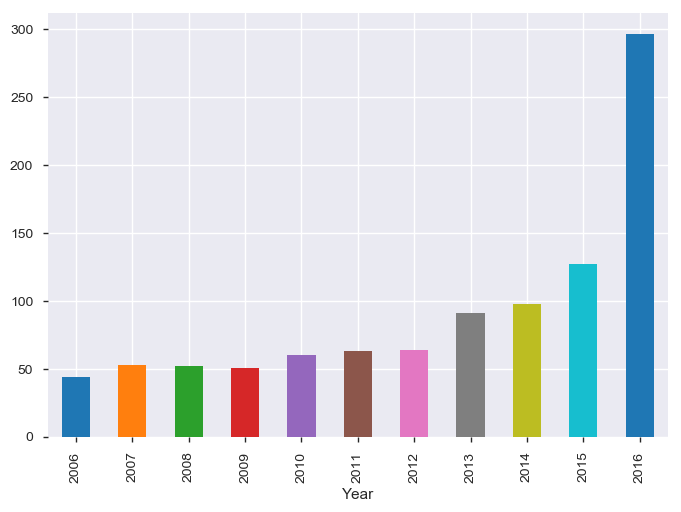

In [40]:
imdb.groupby('Year')['Title'].count().plot.bar()

C:\Users\sudeep_r\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


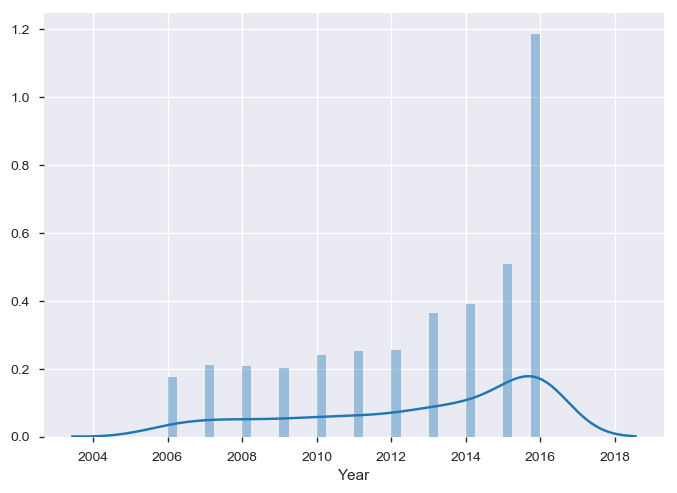

In [41]:
sns.distplot(imdb['Year'], bins=40)

C:\Users\sudeep_r\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sudeep_r\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


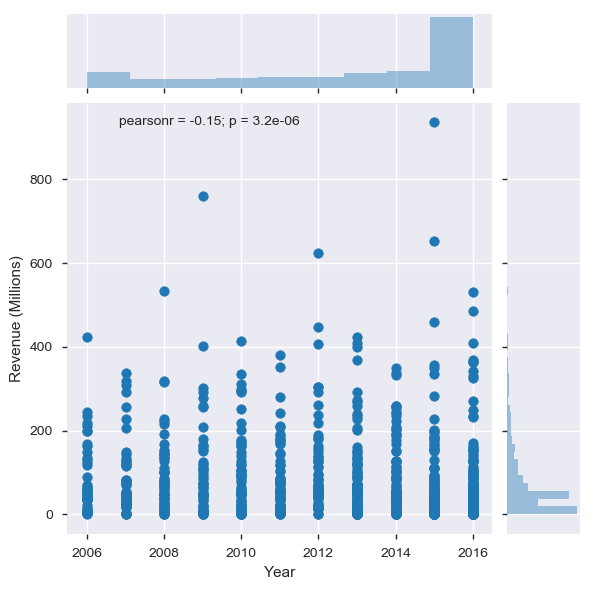

In [42]:
sns.jointplot(x='Year',y='Revenue (Millions)',data=imdb)